<a href="https://colab.research.google.com/github/Shrutiba/iisc_cds/blob/main/M8_AST_03_Time_Series_Statistical_Models_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 3: Time Series Statistical Models

## Learning Objectives

At the end of the experiment, you will be able to

* understand the time series and it's components
* know what are time series statistical models
* measure the dependence of series: auto and cross correlation
* understand stationary time series
* perform correlation analysis on SOI and Recruitment time series

### Time Series

Time series is a sequence of observations recorded at regular time intervals. Time series analysis involves understanding various aspects of the inherent nature of the series to create meaningful and accurate forecasts.

The primary objective of time series analysis is to develop mathematical models that provide plausible descriptions for sample data. In order to provide a statistical setting for describing the character of data that seemingly fluctuate in a random fashion over time, we can assume a time series can be defined as a collection of random variables indexed according to the order they are obtained in time.

For example, we may consider a time series as a sequence of random variables, $x_1, x_2, x_3, . . . ,$ where the random variable $x_1$ denotes the value taken by the series at the first time point, the variable $x_2$ denotes the value for the second time period, $x_3$ denotes the value for the third time period, and so on. In general, a collection of random variables, $\{x_t \}$, indexed by $t$ is referred to as a stochastic process. Here, $t$ will typically be discrete and vary over the integers $t = 0, ±1, ±2, ...,$ or some subset of the integers. The observed values of a stochastic process are referred to as a **realization** of the stochastic process.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2417774" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9886610342" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M8_AST_03_Time_Series_Statistical_Models_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip -q install astsadata")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import required packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf
from astsadata import globtemp, jj, speech, EQ5, EXP6, soi, rec          # Load some astsa(applied statistical time series analysis) data files

#### Components of Time series: Trend

Trend: The general tendency of a time series to increase, decrease or stagnate over a long period of time.

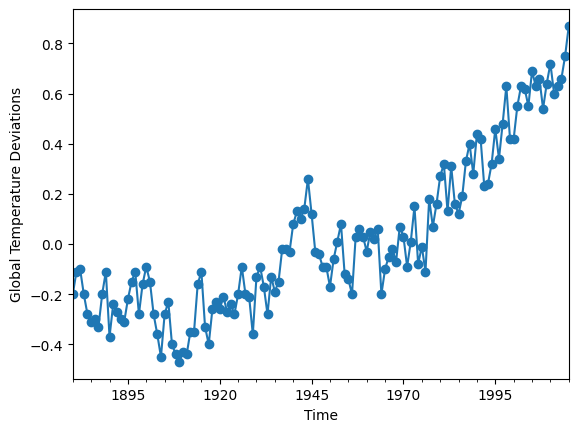

In [5]:
# Visualize yearly average global temperature deviations
globtemp.plot(xlabel='Time', ylabel='Global Temperature Deviations', marker='o', legend=False)
plt.show()

Consider the global temperature series record shown in the above plot. The data are the global mean land-ocean temperature index from 1880 to 2015, with the base period 1951-1980. In particular, the data are deviations, measured in degrees centigrade, from the 1951-1980 average. We note an apparent upward trend in the series during the latter part of the twentieth century that has been used as an argument for the global warming hypothesis.

#### Components of Time series: Seasonality

Seasonal variation: Explains the fluctuations within a year during the season, probably caused by climate and weather conditions, customs, etc.

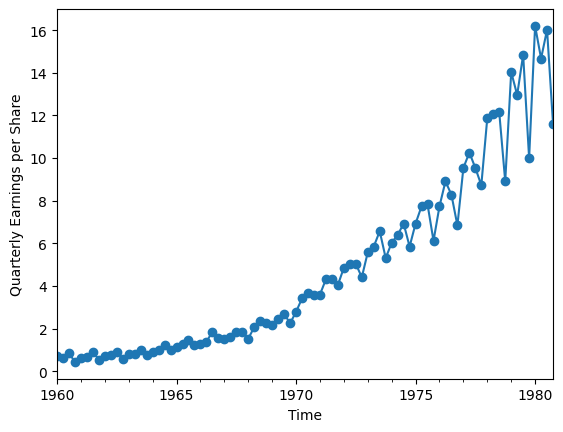

In [6]:
# Visualize Johnson & Johnson quarterly earnings per share
jj.plot(xlabel='Time', ylabel='Quarterly Earnings per Share', marker='o', legend=False)
plt.show()

The above plot shows quarterly earnings per share for the U.S. company Johnson & Johnson, furnished by Professor Paul Griffin of the Graduate School of Management, University of California, Davis. There are 84 quarters (21 years) measured from the first quarter of 1960 to the last quarter of 1980. Modeling such series begins by observing the primary patterns in the time
history. In this case, note the gradually increasing underlying trend and the rather regular variation superimposed on the trend that seems to repeat over quarters.

#### Components of Time series: Cyclical variation

This component describes the medium-term changes caused by circumstances, which repeat in cycles.

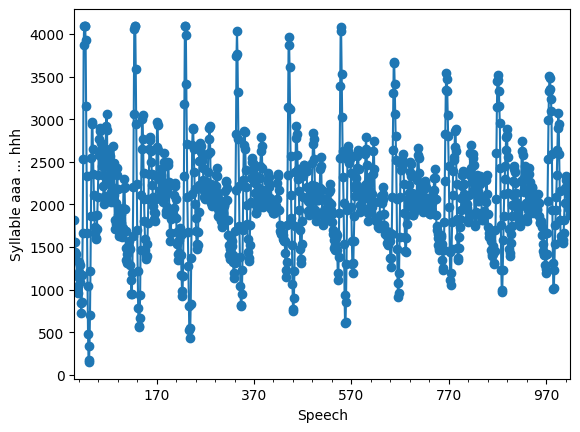

In [8]:
# Visualize speech recording of the syllable aaa · · · hhh
# YOUR CODE HERE to plot 'speech'
speech.plot(xlabel='Speech', ylabel='Syllable aaa ... hhh', marker='o', legend=False)
plt.show()

The above plot shows a small .1 second (1000 point) sample of recorded speech for the phrase aaa · · · hhh, and we note the repetitive nature of the signal and the rather regular periodicities. We can notice the rather regular repetition of small wavelets. The separation between the packets is known as the pitch period and represents the response of the vocal tract filter to a periodic sequence of pulses stimulated by the opening and closing of the glottis.

#### Components of Time series: Irregular variation

Irregular variations in a time series are caused by unpredictable influences, which are not regular and do not repeat in a particular pattern. These variations are caused by incidences such as explosion, strike, earthquake, flood, revolution, etc.

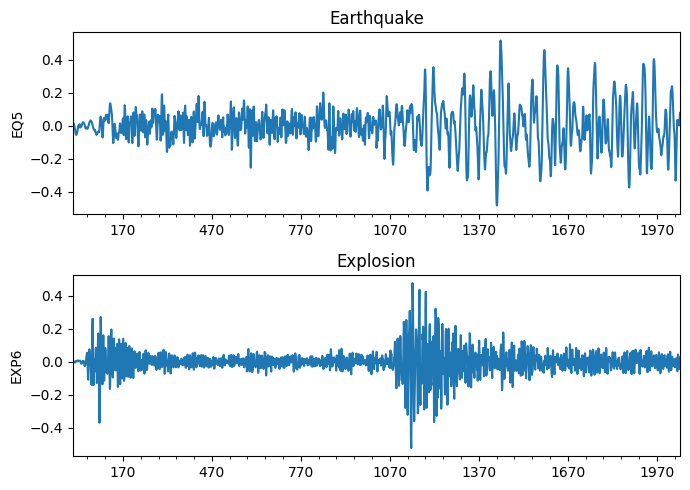

In [10]:
# Visualize arrival phases from an earthquake and explosion
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
EQ5.plot(ax=axes[0], ylabel="EQ5", title="Earthquake", legend=False)
# YOUR CODE HERE to plot 'EXP6' with ax=axes[1], ylabel="EXP6", title="Explosion", legend=False
EXP6.plot(ax=axes[1], ylabel="EXP6", title="Explosion", legend=False)
fig.tight_layout()
plt.show()

### Statistical Models

The fundamental visual characteristic distinguishing the different series is their differing degrees of smoothness. One possible explanation for this smoothness is that it is being induced by the supposition that adjacent points in time are correlated, so the value of the series at time $t$, say, $x_t$, depends in some way on the past values $x_{t−1}, x_{t−2}, \cdots$. This model expresses a fundamental way to generate realistic-looking time series.

#### White Noise

A simple kind of generated series is a collection of uncorrelated random
variables, $w_t$, with mean $0$ and finite variance $σ^2_w$. The time series generated from uncorrelated variables is used as a model for noise in engineering applications, where it is called **white noise**; we denote this process as $w_t ∼ wn(0, σ^2_w)$.

A particularly useful white noise series is Gaussian white noise, wherein the $w_t$ are independent normal random variables, with mean $0$ and variance $σ^2_w$.

<font color="blue">Discussion 1: What is the significance of 'white' in White Noise?</font>

Let's create and plot a Gaussian white noise with mean= 0 and variance= 1:

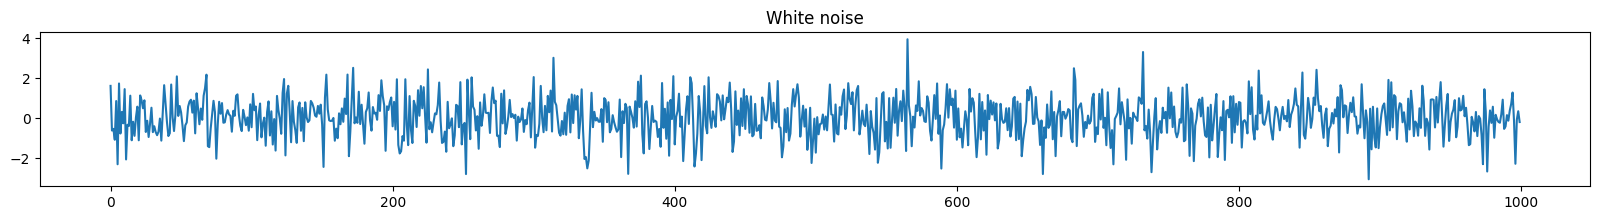

In [11]:
# Seed random number generator
np.random.seed(1)

mean = 0.0
var = 1.0
# Create white noise series
series = [np.random.normal(mean, var**0.5) for i in range(1000)]
series = pd.Series(series)

# Visualize series
plt.figure(figsize=(20, 2))
plt.plot(series)
plt.title("White noise")
plt.show()

The resulting series is not smooth enough to serve as a plausible model for any of the other experimental series. The plot tends to show visually a mixture of many different kinds of oscillations in the white noise series.

If the stochastic behavior of all time series could be explained in terms of the
white noise model, classical statistical methods would suffice. Two ways of introducing serial correlation and more smoothness into time series models are:

* Moving Averages

* Autoregressions

#### Moving Averages

Moving average smooths the time series. For example, we can replace $w_t$ in white noise generated above by an average of its current value and its immediate neighbors in the past and future. That is, let

$$v_t = \frac{1}{3}(w_{t−1} + w_t + w_{t+1})$$

which leads to a new series.

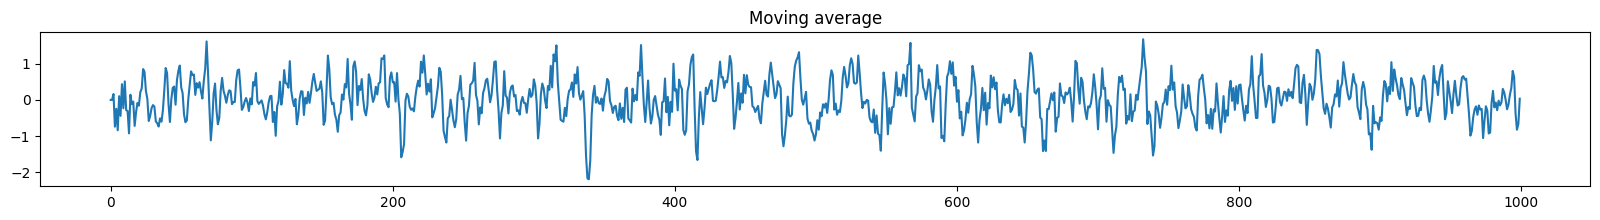

In [13]:
# Moving average

plt.figure(figsize=(20, 2))
# Perform rolling operation
new_series1 = series.rolling(window=3).mean()
# Fill missing values with 0
new_series1 = new_series1.fillna(0)
plt.title("Moving average")
# YOUR CODE HERE to plot 'new_series1'
plt.plot(new_series1)
plt.show()

From the above plot, we can see the new series shows a smoother version of the first series, reflecting the fact that the slower oscillations are more apparent and some of the faster oscillations are taken out.

#### Autoregressions

Suppose we consider the white noise series $w_t$ as input and calculate the output using the second-order equation:

$$x_t = x_{t−1} − 0.9x_{t−2} + w_t$$

successively for $t = 1, 2, . . ., 1000$.

The above equation represents a regression or prediction of the current value $x_t$ of a time series as a function of the past two values of the series.

Let's create a new series using the above autoregression expression:

<font color="blue">Discussion 2: What is the significance of 'auto' in Autoregression?</font>

In [14]:
# Autoregression
xt_1 = 0
xt_2 = 0
new_series2 = list()
for i in range(len(series)):
    x = xt_1 - 0.9 * xt_2 + series[i]
    if i > 1:
        xt_2 = xt_1
        xt_1 = x
    new_series2.append(x)
# Convert to Series datatype
# YOUR CODE HERE to convert 'new_series2' to pd.Series datatype
new_series2 = pd.Series(new_series2)
len(new_series2)

1000

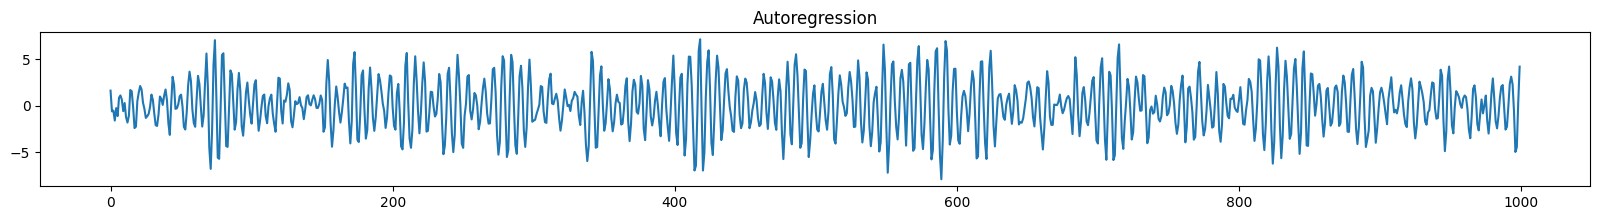

In [15]:
# Visualize new series
plt.figure(figsize=(20, 2))
# YOUR CODE HERE to plot 'new_series2'
plt.plot(new_series2)
plt.title("Autoregression")
plt.show()

The resulting output series shows the periodic behavior of the series. The autoregressive model above and its generalizations can be used as an underlying model for many series.

Now, let's see some various theoretical measures used for describing how time series behave. The most useful descriptive measures are those expressed in terms of covariance and correlation functions.

### Measure of Dependence (Optional)

Time series often display serial dependence. Serial dependence occurs when the value of a datapoint at one time is statistically dependent on another datapoint at another time. The lack of independence between two adjacent values $x_s$ and $x_t$ can be assessed numerically, as in classical statistics, using the notions of covariance and correlation.

Assuming the variance of $x_t$ is finite, we have the autocovariance function defined as the second-moment product

$$γ_x(s, t) = cov(x_s, x_t) = E[(x_s − µ_s)(x_t − µ_t)],$$

for all $s$ and $t$.

The **autocovariance measures the linear dependence between two points on the
same series observed at different times**.

As in classical statistics, it is more convenient to deal with a measure of association between −1 and 1, and this leads to the **autocorrelation function (ACF)** defined as

$$ρ(s, t) = \frac{γ(s, t)}{\sqrt{γ(s, s)γ(t, t)}}.$$

The **ACF measures the linear predictability of the series at time $t$, say $x_t$ , using only the value $x_s$**. If we can predict $x_t$ perfectly from $x_s$ through a linear relationship, $x_t = β_0 + β_1 x_s$, then the correlation will be +1 when $β1 > 0$, and −1 when $β1 < 0$. Hence, we have a rough measure of the ability to forecast the series at time $t$ from the value at time $s$.

Let's plot the autocorrelation of the white noise series and autoregression series separately as number of lag on x-axis.

The lag is the number of time periods that separate the two time series.

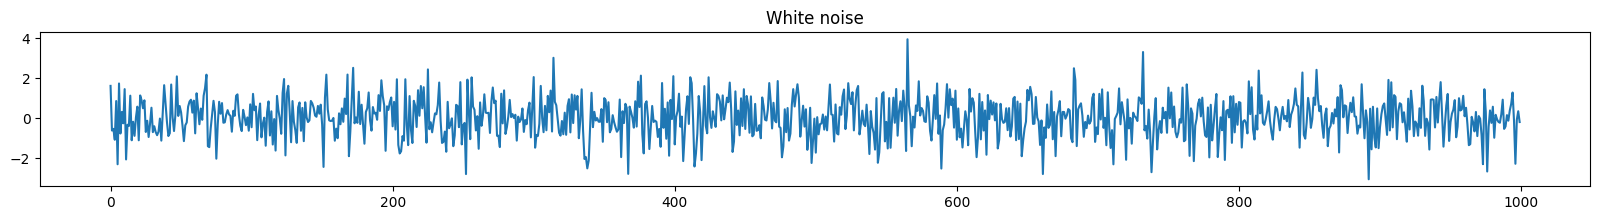

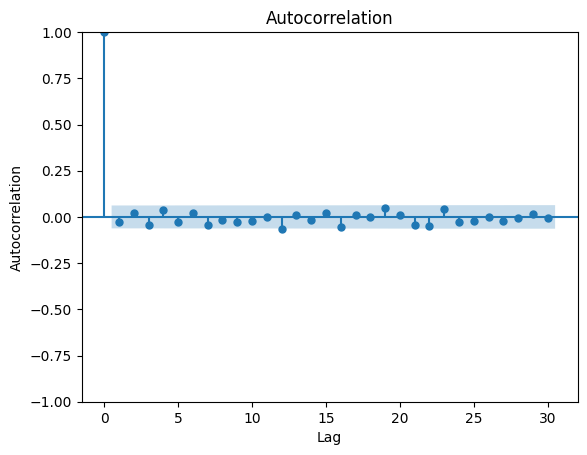

In [16]:
# Visualize white noise autocorrelation
plt.figure(figsize=(20, 2))
plt.plot(series)
plt.title("White noise")

plot_acf(series)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

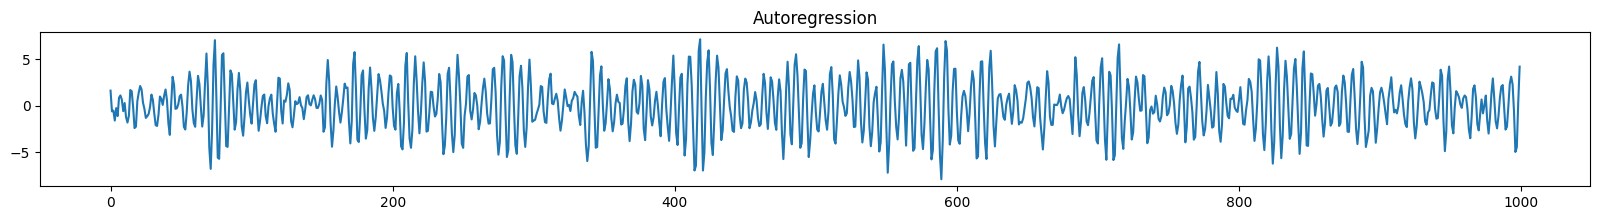

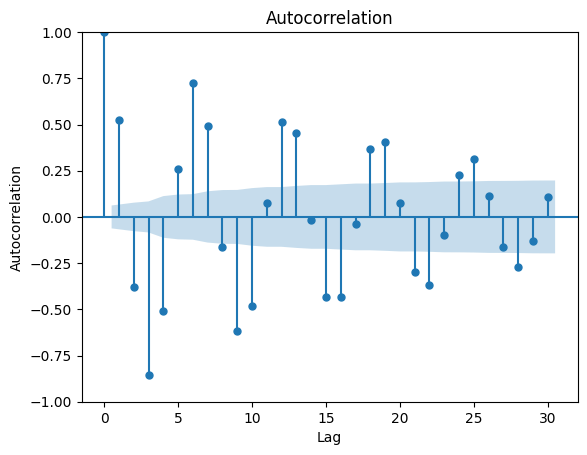

In [17]:
# Visualize Autoregression autocorrelation
plt.figure(figsize=(20, 2))
plt.plot(new_series2)
plt.title("Autoregression")

# YOUR CODE HERE to plot acf of 'new_series2'
plot_acf(new_series2)
# YOUR CODE HERE for xlabel
plt.xlabel("Lag")

# YOUR CODE HERE for ylabel
plt.ylabel("Autocorrelation")
plt.show()

From the above plots, it can be seen that very smooth series (eg. autoregression series) exhibit autocovariance functions that stay large even when the $t$ and $s$ are far apart (higher `lags` value), whereas choppy series (eg. white noise) tend to have autocovariance functions that are nearly zero for large separations.

**Note:** Those lags with values exceeding the shaded band are significant.

Similarly, we can measure the predictability of another series $y_t$ from the series $x_s$. Assuming both series have finite variances, we have the **cross-covariance function** between two series, $x_t$ and $y_t$ given by,

$$γ_{xy}(s, t) = cov(x_s, y_t) = E[(x_s − µ_{xs})(y_t − µ_{yt})].$$

The scaled version of the cross-covariance function is the **cross-correlation function (CCF)** given by

$$ρ_{xy}(s, t) = \frac{γ_{xy}(s, t)}{\sqrt{γ_x(s, s)γ_y(t, t)}}.$$

Let's plot the crosscorrelation of the white noise series and autoregressive series.

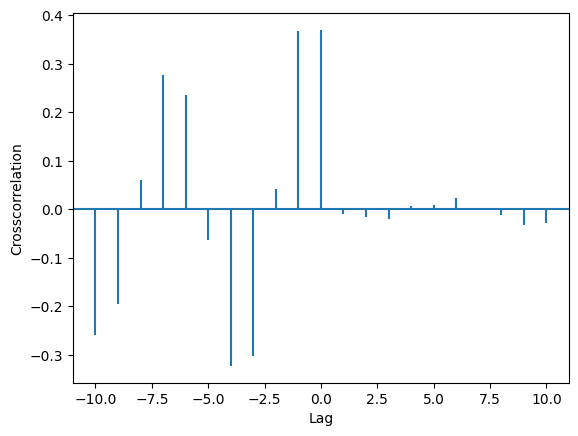

In [18]:
# Visualize crosscorrelation b/w autoregressive and white noise series
plt.xcorr(series, new_series2)
plt.xlabel("Lag")
plt.ylabel("Crosscorrelation")
plt.show()

From the above plot, we can see the predictability of autoregressive series from the white noise series for negative lag values. This is because the negative lag means the white noise series is shifted forward and the autoregression is derived from the linear relationship of the previous time point values. However, for positive lag values, the correlation is less as in this case the autoregressive series is shifted forward.

### Stationary Time Series

A sort of regularity may exist over time in the behavior of a time series which can be introduced using a concept called **stationarity**.

A **strictly stationary** time series is one for which the probabilistic behavior of every collection of values $\{x_{t_1}, x_{t_2}, . . ., x_{t_k}\}$ is identical to that of the time shifted set $\{x_{t_{1+h}}, x_{t_{2+h}}, . . ., x_{t_{k+h}}\}.$ That is,

$$Pr\{x_{t_1} ≤ c_1, . . ., x_{t_k} ≤ c_k \} = Pr\{x_{t_{1+h}} ≤ c_1, . . ., x_{t_{k+h}} ≤ c_k \}$$

for all $k = 1, 2, ...,$ all time points $t_1, t_2, . . ., t_k$ , all numbers $c_1, c_2, . . ., c_k$ , and all time shifts $h = 0, ±1, ±2, \cdots $.

If a time series is strictly stationary, then all of the multivariate distribution functions for subsets of variables must agree with their counterparts in the shifted set for all values of the shift parameter h. In addition,

* if the mean function, $µ_t$, of the series exists, the above expression implies that $µ_s = µ_t$ for all $s$ and $t$, and hence $µ_t$ must be constant.

* if the variance function of the process exists, the autocovariance function of the process depends only on the time difference between $s$ and $t$, and not on the actual times i.e, $γ(s,t)=γ(s+h,t+h)$.

Now, rather than imposing conditions on all possible distributions of a time series, we can use a milder version that imposes conditions only on the first two moments of the series i.e, weakly stationary.

A **weakly stationary** time series, $x_t$, is a finite variance process such that

* the mean value function, $µ_t$, is constant and does not depend on time $t$, and

* the autocovariance function, $γ(s, t)$, depends on $s$ and $t$ only through their difference $|s − t|$.

Stationarity requires regularity in the mean and autocorrelation functions so that these quantities (at least) may be estimated by averaging. One important case where weakly stationarity implies strict stationarity is if the time series is Gaussian (meaning all finite distributions of the series are Gaussian).

As the mean function, $E(x_t) = µ_t$, of a stationary time series is independent of time $t$, we can write $µ_t = µ.$

Also, because the autocovariance function, $γ(s, t)$, of a stationary time series, $x_t$, depends on $s$ and $t$ only through their difference $|s −t|$, we may simplify the notation.

Let $s = t + h$, where $h$ represents the time shift or lag. Then

$$γ(t + h, t) = cov(x_{t+h}, x_t) = cov(x_h, x_0) = γ(h, 0)$$

because the time difference between times $t+h$ and $t$ is the same as the time difference between times $h$ and $0$. Thus, the autocovariance function of a stationary time series does not depend on the time argument $t$. Therefore, we can drop the second argument of $γ(h, 0)$.

The **autocovariance function** of a stationary time series will be written as

$$γ(h) = cov(x_{t+h}, x_t) = E[(x_{t+h} − µ)(x_t − µ)].$$

The **autocorrelation function (ACF)** of a stationary time series will be written as

$$ρ(h) = \frac{γ(t + h, t)}{\sqrt{γ(t + h, t + h)γ(t, t)}} = \frac{γ(h)}{γ(0)}.$$

To know more about stationary time series, click [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module6/M6_AST_03_Time_Series_Statistical_Models_stationary%20time%20series.pdf).

**Stationarity of White Noise**

The mean and autocovariance functions of the white noise series are easily evaluated as $µ_{wt} = 0$ and

$$γ_w(h) = cov(w_{t+h}, w_t) =\begin{equation}
\left\{
  \begin{aligned}
    &\sigma_w^2&  \ \ h = 0, \\
    &0&   \ h \neq 0,\\
  \end{aligned}
  \right.
\end{equation}
$$

Thus, white noise satisfies the conditions and is weakly stationary
or stationary. If the white noise variates are also normally distributed, the series is also strictly stationary. The autocorrelation function is given by $ρ_w(0) = 1$ and $ρ(h) = 0$ for $h \neq 0$ as shown in the below code cell.

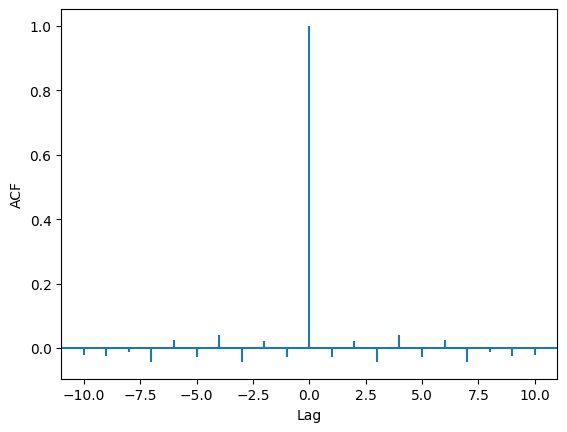

In [19]:
# Visualize autocorrelation of white noise series
plt.xcorr(series, series)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

**Stationarity of a Moving Average**

The three-point moving average process is stationary because, the mean and autocovariance functions $µ_{v_t} = 0$, and

$$γ_v(h) =\begin{equation}
\left\{
  \begin{aligned}
    &\frac{3}{9}\sigma_w^2&  \ \ h = 0, \\
    &\frac{2}{9}\sigma_w^2&  \ \ h = \pm1, \\
    &\frac{1}{9}\sigma_w^2&  \ \ h = \pm2, \\
    &0&   \ |h| > 2,\\
  \end{aligned}
  \right.
\end{equation}
$$

are independent of time $t$, satisfying the conditions of weakly stationary series. The autocorrelation function is given by

$$ρ_v(h) =\begin{equation}
\left\{
  \begin{aligned}
    &1&  \ \ h = 0, \\
    &2/3&  \ \ h = \pm1, \\
    &1/3&  \ \ h = \pm2, \\
    &0&   \ |h| > 2,\\
  \end{aligned}
  \right.
\end{equation}
$$


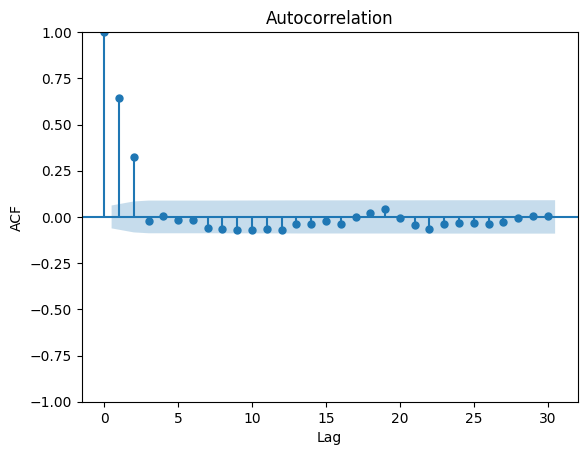

In [20]:
# Visualize autocorrelation of moving average series
# YOUR CODE HERE to plot autocorrelation of 'new_series1'
plot_acf(new_series1)
# YOUR CODE HERE for xlabel
plt.xlabel("Lag")

# YOUR CODE HERE for ylabel
plt.ylabel("ACF")
plt.show()

**SOI and Recruitment Correlation Analysis**

The autocorrelation and cross-correlation functions are also useful for analyzing the joint behavior of two stationary series whose behavior may be related in some unspecified way.

We have simultaneous monthly readings of an environmental series called the **Southern Oscillation Index (SOI)** and associated **Recruitment (number of new fish)** furnished by Dr. Roy Mendelssohn of the Pacific Environmental Fisheries Group. The SOI measures changes in air pressure, related to sea surface temperatures in the central Pacific Ocean. Both series are for a period of 453 months ranging over the years 1950–1987.

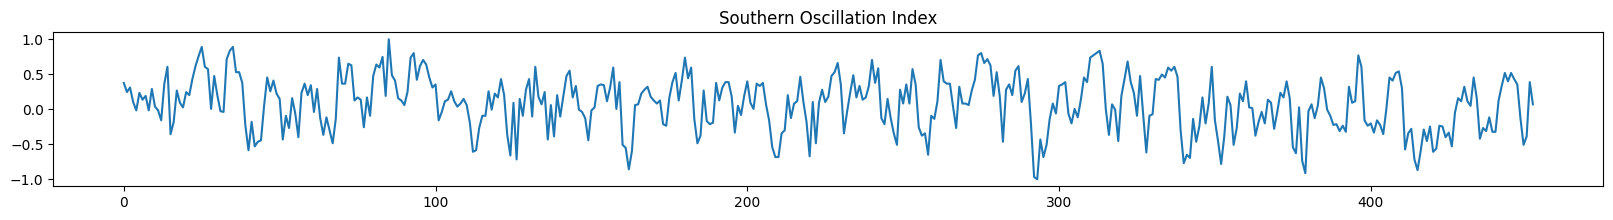

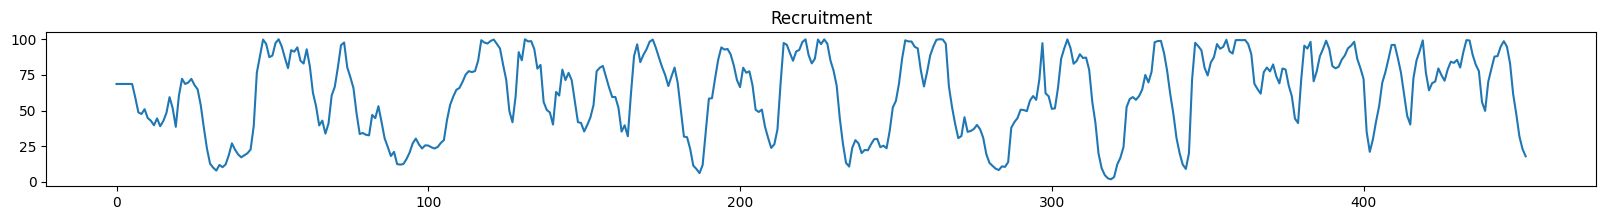

In [22]:
# Visualize SOI series
plt.figure(figsize=(20, 2))
plt.plot(soi['value'].values)
plt.title("Southern Oscillation Index")
plt.show()

# Visualize Recruitement series
plt.figure(figsize=(20, 2))
# YOUR CODE HERE to plot 'rec' series
plt.plot(rec['value'].values)
plt.title("Recruitment")
plt.show()

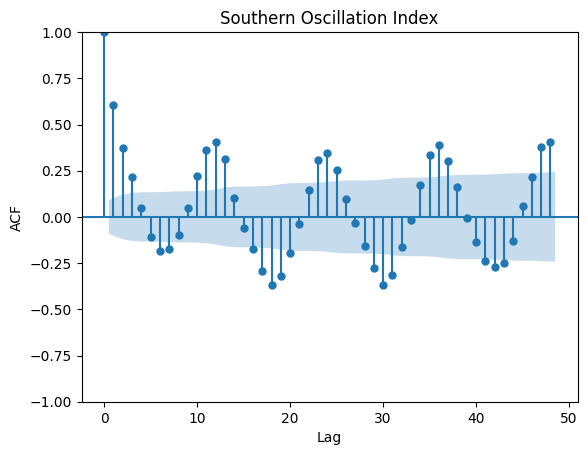

In [23]:
# Visualize ACF of SOI series
plot_acf(soi['value'].values, lags=48)
plt.title("Southern Oscillation Index")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

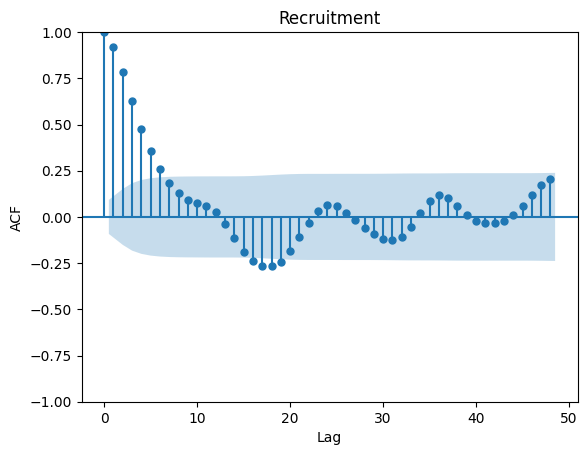

In [24]:
# Visualize ACF of Recruitment series
# YOUR CODE HERE to plot acf of 'rec' series with lags=48
plot_acf(rec['value'].values, lags=48)
plt.title("Recruitment")
# YOUR CODE HERE for xlabel
plt.xlabel("Lag")
# YOUR CODE HERE for ylabel
plt.ylabel("ACF")
plt.show()

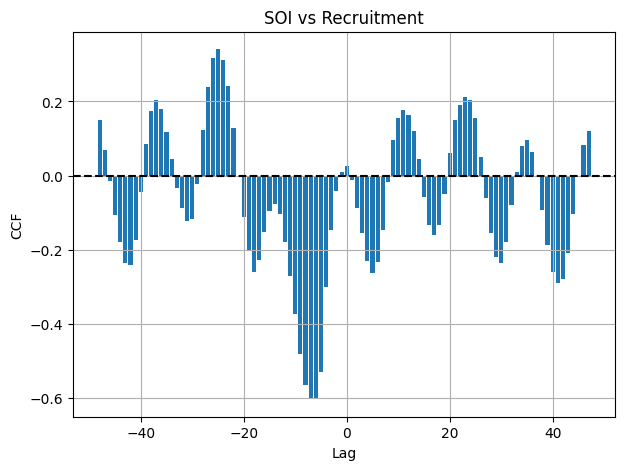

In [25]:
# Visualize CCF of SOI and Recruitment series

ccf = list()
max_lag = 12*4
for i in range(-max_lag, max_lag):
    # save CCF of SOI and Recruitement series at each lag
    ccf.append(soi['value'].corr(rec['value'].shift(i)))

plt.figure(figsize=(7,5))
plt.bar(range(-max_lag, max_lag), ccf)
# YOUR CODE HERE to plot a black dashed line overlapping x-axis for range [-max_lag, max_lag]
plt.axhline(0, color='black', linestyle='--')
plt.title("SOI vs Recruitment")
plt.xlabel("Lag")
plt.ylabel("CCF")
# YOUR CODE HERE to show grid lines
plt.grid(True)
plt.show()

The above plots shows the autocorrelation and cross-correlation functions (ACFs and CCF) for two series (SOI and Recruitment). Both of the ACFs exhibit periodicities corresponding to the correlation between values separated by 12 units. Observations 12 months or one year apart are strongly positively correlated, as are observations at multiples such as 24, 36, 48, . . . Observations separated by 6 months are negatively correlated, showing that positive excursions tend to be associated with negative excursions six months removed.

The sample CCF, however, shows some departure from the cyclic component of each series and there is a peak at $h = −6$. This result implies that SOI measured at time $t-6$ months is associated with the Recruitment series at time $t$. We could say the SOI leads the Recruitment series by six months. The sign of the CCF is negative, leading to the conclusion that the two series move in different directions; that is, increases in SOI lead to decreases in Recruitment and vice versa.

### Please answer the questions below to complete the experiment:




In [26]:
#@title Select the False statement: { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "The cross-covariance measures the linear dependence between two points on the same series observed at different times" #@param ["", "For a series to be weakly stationary, one of the conditions is that the mean value function should be constant", "The cross-correlation of a series with itself gives the auto-correlation of that series", "The cross-covariance measures the linear dependence between two points on the same series observed at different times"]

In [27]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [28]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = ".." #@param {type:"string"}


In [29]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [32]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [33]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [34]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7179
Date of submission:  31 Jul 2025
Time of submission:  14:44:40
View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions
